In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-dataset-for-outlier-removal/placement.csv


In [2]:
df = pd.read_csv('/kaggle/input/placement-dataset-for-outlier-removal/placement.csv')

In [3]:
df.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.isnull().mean()*100

cgpa                    0.0
placement_exam_marks    0.0
placed                  0.0
dtype: float64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [9]:
warnings.filterwarnings("ignore")

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

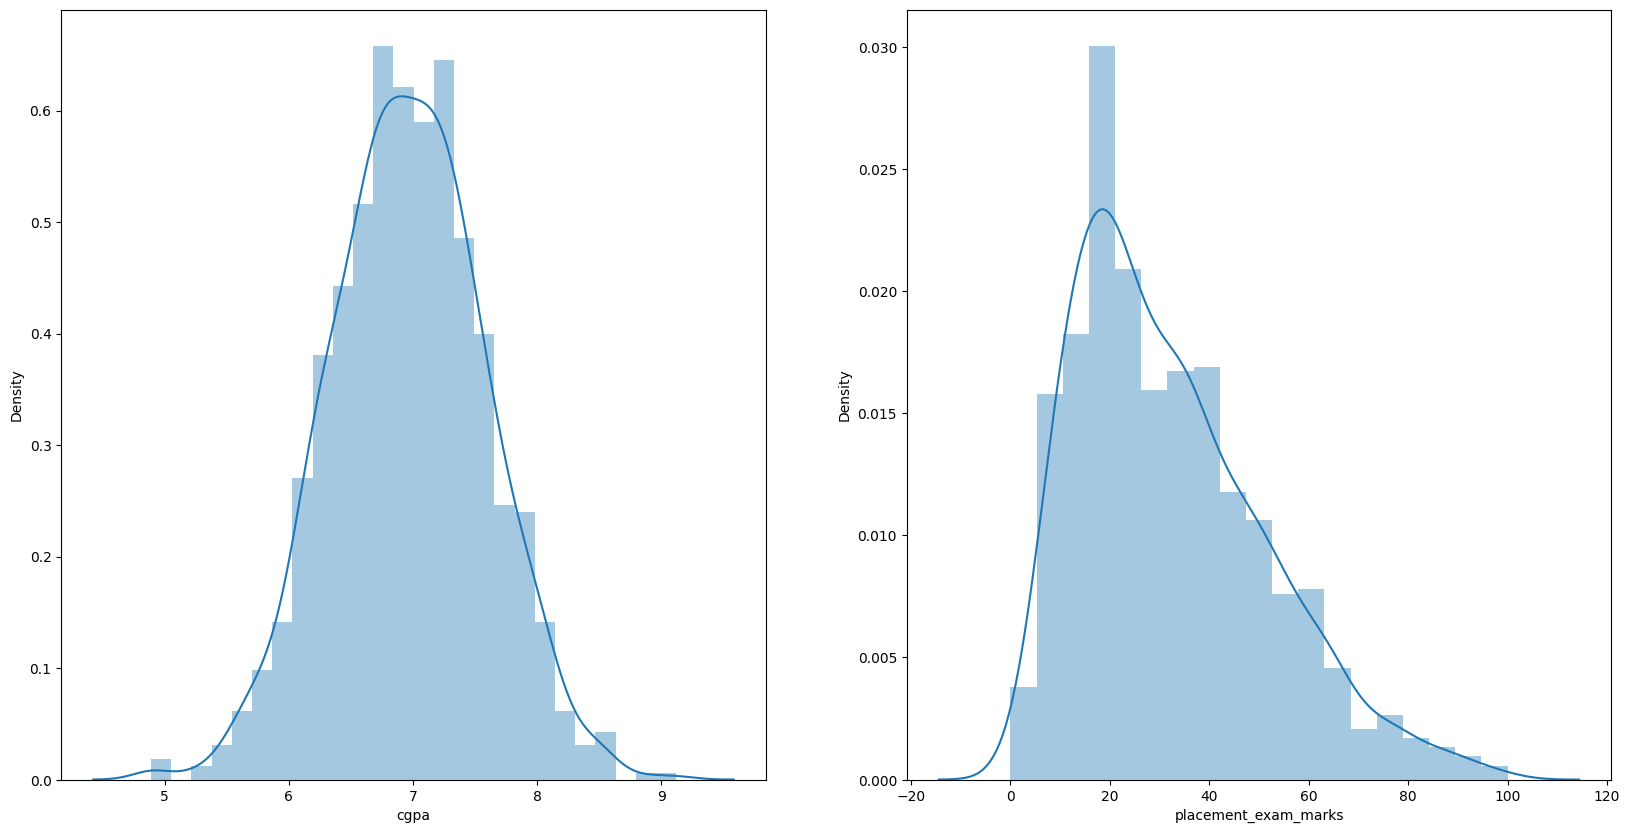

In [15]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

### from above two PDF we can see that cgpa is normally distributed while Placement_exam_marks is right skewed, so we will apply z-score on cgpa column

<Axes: >

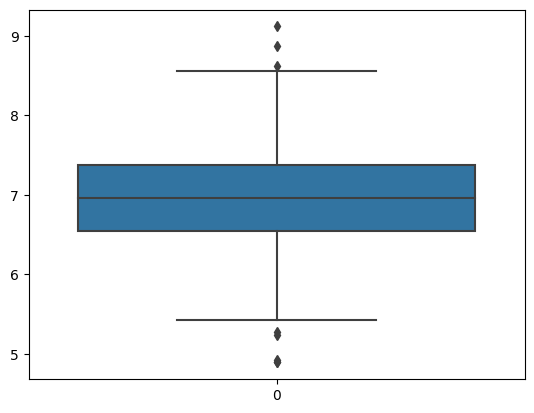

In [16]:
sns.boxplot(df['cgpa'])

In [18]:
upperlimit = df['cgpa'].mean() + 3 * df['cgpa'].std()
lowerlimit = df['cgpa'].mean() - 3 * df['cgpa'].std()

In [20]:
upperlimit, lowerlimit

(8.808933625397168, 5.113546374602832)

In [21]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

We can see that min and max are out of the allowable values from z-score

### Approach 1 : trimming

In [26]:
new_df = df[(df['cgpa'] <= 8.8089) & (df['cgpa'] >= 5.1135)]

In [27]:
new_df['cgpa'].describe()

count    995.000000
mean       6.963357
std        0.600082
min        5.230000
25%        6.550000
50%        6.960000
75%        7.365000
max        8.620000
Name: cgpa, dtype: float64

### Approach 2 : Capping

In [30]:
df['cgpa_capped'] = np.where(
                            df['cgpa'] <= 5.1135 ,
                                lowerlimit,
                            np.where(df['cgpa'] >= 8.8089 ,
                                         upperlimit, df['cgpa']))

In [32]:
df.describe()

,cgpa,placement_exam_marks,placed,cgpa_capped
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000,6.961499
std,0.615898,19.130822,0.500129,0.612688
min,4.890000,0.000000,0.000000,5.113546
25%,6.550000,17.000000,0.000000,6.550000
50%,6.960000,28.000000,0.000000,6.960000
75%,7.370000,44.000000,1.000000,7.370000
max,9.120000,100.000000,1.000000,8.808934


<Axes: xlabel='cgpa_capped', ylabel='Density'>

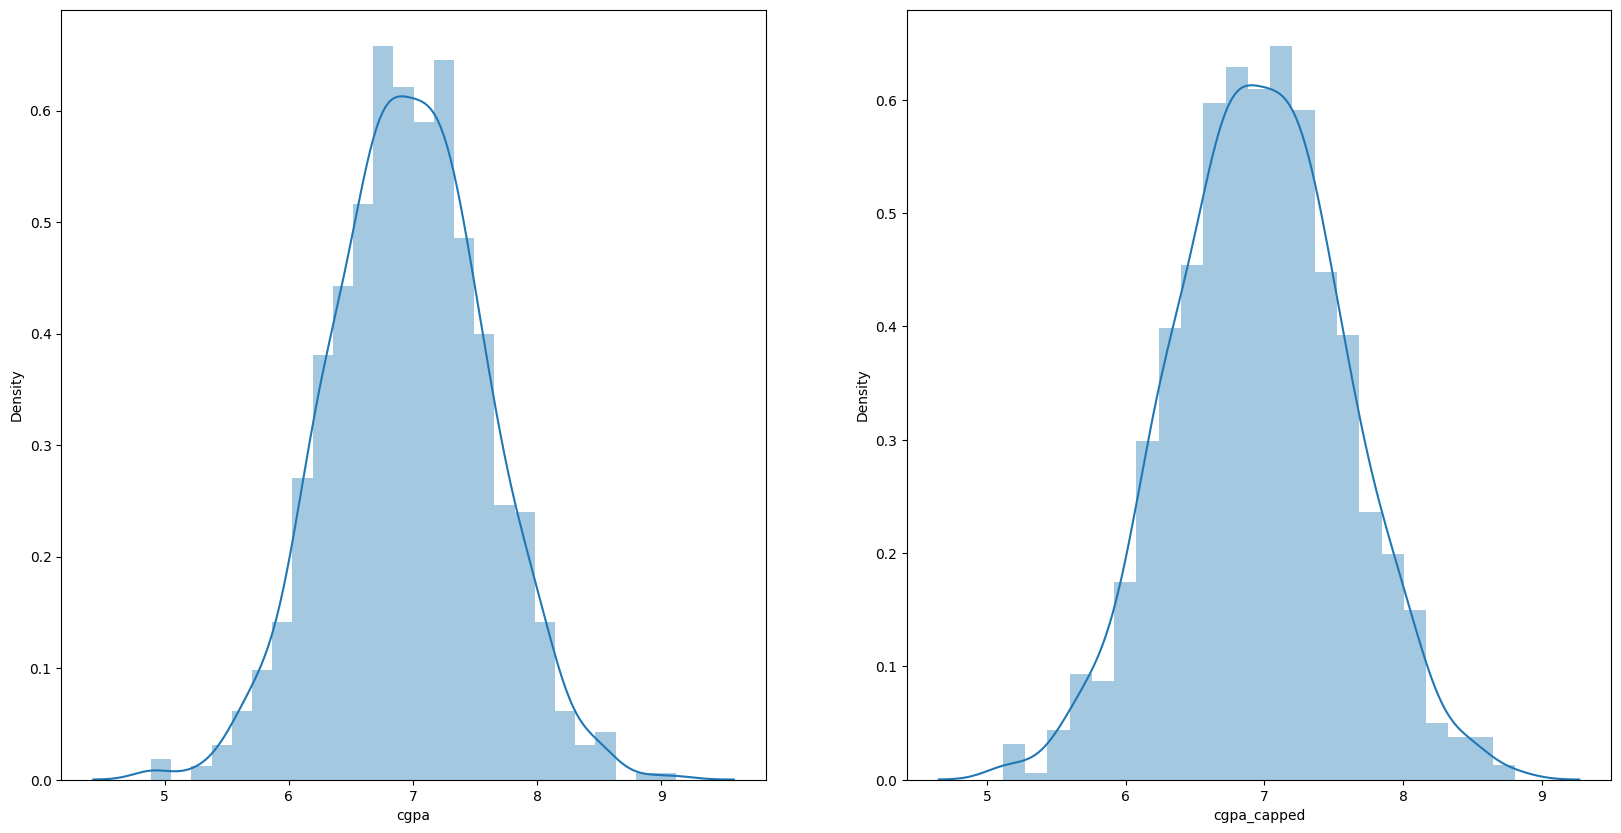

In [31]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['cgpa_capped'])

### Other approach is with z-score formula : (X - mean)/ standard deviation and the allowable range is [-3, 3] 

In [37]:
df['z_score_cgpa'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()

In [38]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_capped,z_score_cgpa
0,7.19,26.0,1,7.19,0.371425
1,7.46,38.0,1,7.46,0.809810
2,7.54,40.0,1,7.54,0.939701
3,6.42,8.0,1,6.42,-0.878782
4,7.23,17.0,0,7.23,0.436371


In [39]:
df[(df['z_score_cgpa'] > -3) & (df['z_score_cgpa'] < 3)]

,cgpa,placement_exam_marks,placed,cgpa_capped,z_score_cgpa
0,7.19,26.0,1,7.19,0.371425
1,7.46,38.0,1,7.46,0.809810
2,7.54,40.0,1,7.54,0.939701
3,6.42,8.0,1,6.42,-0.878782
4,7.23,17.0,0,7.23,0.436371
...,...,...,...,...,...
991,7.04,57.0,0,7.04,0.127878
992,6.26,12.0,0,6.26,-1.138565
993,6.73,21.0,1,6.73,-0.375452
994,6.48,63.0,0,6.48,-0.781363
